***
# __Linear Regression Model Optimization by Removing Outliers and Variable Transformations__

Variable transformation is a way to make the data work better in your model. Data variables can have two types of form: numeric variable and categorical variable, and their transformation should have different approaches.

Sometimes a dataset can contain extreme values that are outside the range of what is expected and unlike the other data. These are called outliers and often machine learning modeling and model skill in general can be improved by understanding and even removing these outlier values.



***
## __Recap__

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import scipy.stats as stats
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error

from yellowbrick.regressor import PredictionError, ResidualsPlot

## __Load California Housing Dataset__

In [2]:
data = fetch_california_housing()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [3]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
california_housing = pd.DataFrame(data.data, columns=data.feature_names)
california_housing


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [5]:
california_housing['Price'] = data.target
california_housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [6]:
features = data.feature_names
print(features)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [7]:
imp_features = list(features)[1:6]
imp_features

['HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

E:\Data_Science_Envs\Linear_Reg_Env\env\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
E:\Data_Science_Envs\Linear_Reg_Env\env\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


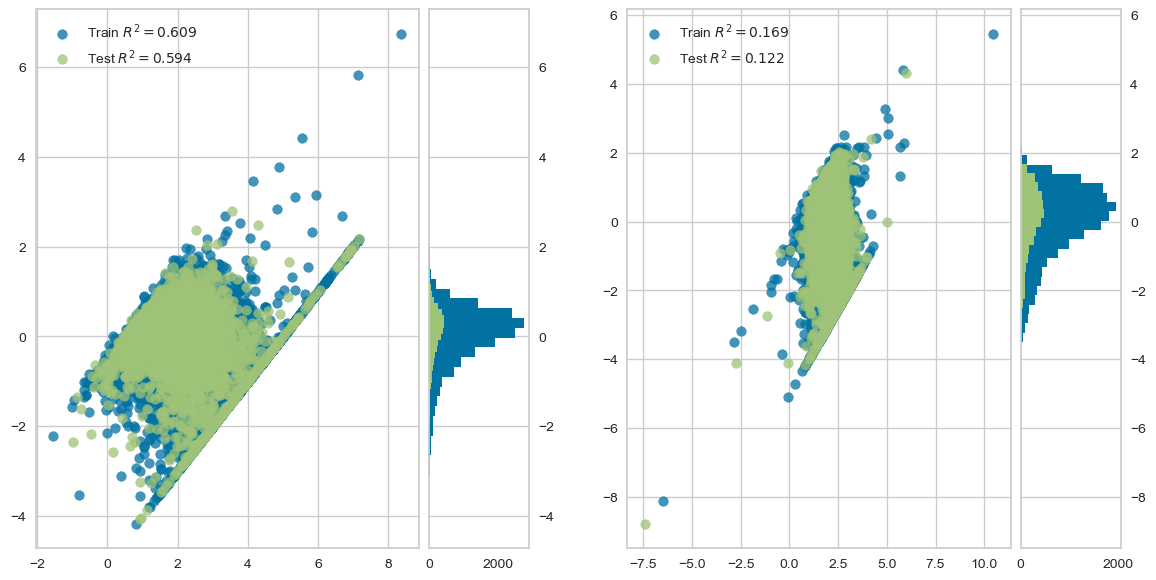

In [8]:
def run_Linear_Regression(df):
    fig,ax = plt.subplots(ncols=2, figsize=(14,7))
    
    #reference plot
    X_train, X_test, y_train, y_test = train_test_split(california_housing[features], california_housing['Price'],
                test_size=0.2,
                random_state=0)
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    visualizer = ResidualsPlot(model, ax=ax[0])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    plt.legend()
  

    #Residuals Plot with Selected Features
    #reference plot
    X_train, X_test, y_train, y_test = train_test_split(df, california_housing['Price'],
                test_size=0.2,
                random_state=0)
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    visualizer = ResidualsPlot(model, ax=ax[1])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    plt.legend()

    
run_Linear_Regression(california_housing[imp_features])

***
## __Check Linear Model Assumptions on Selected Features__

In [9]:
imp_features

['HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

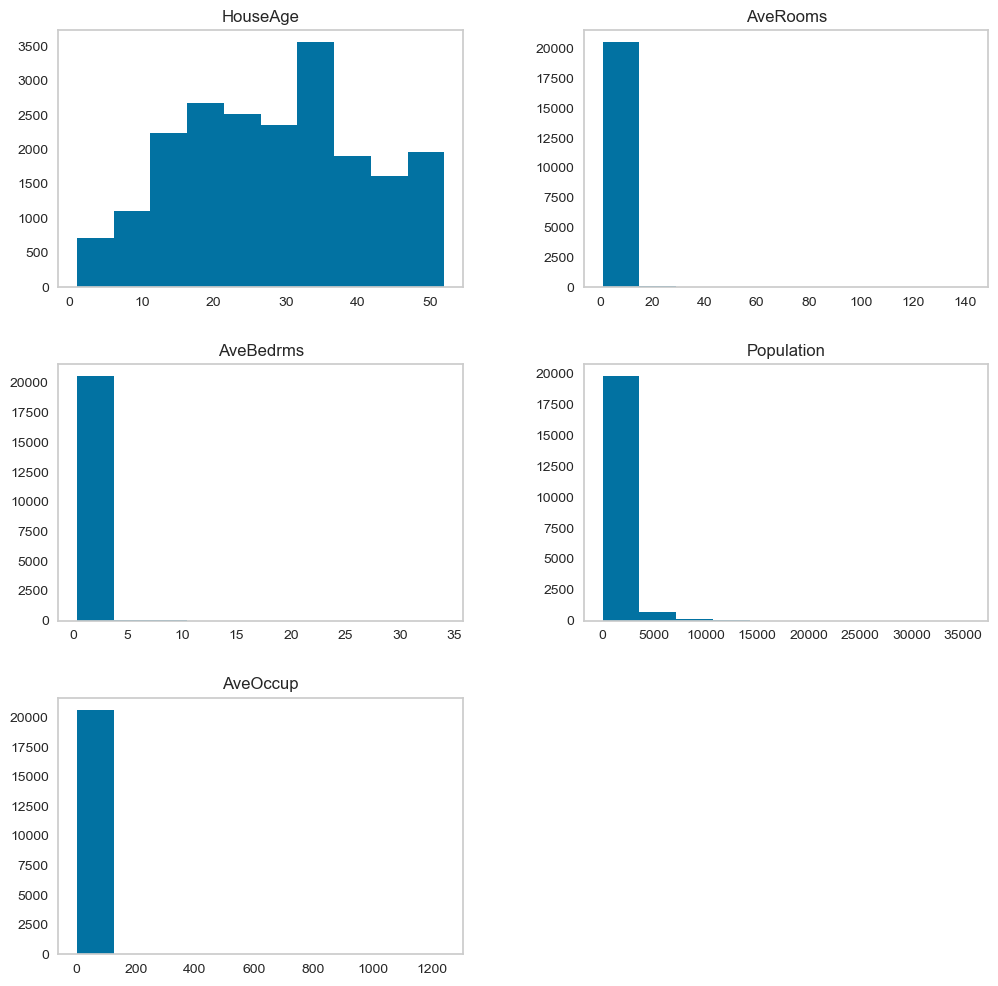

In [10]:
california_housing[imp_features].hist(figsize=(12,12), grid=False)
plt.show()

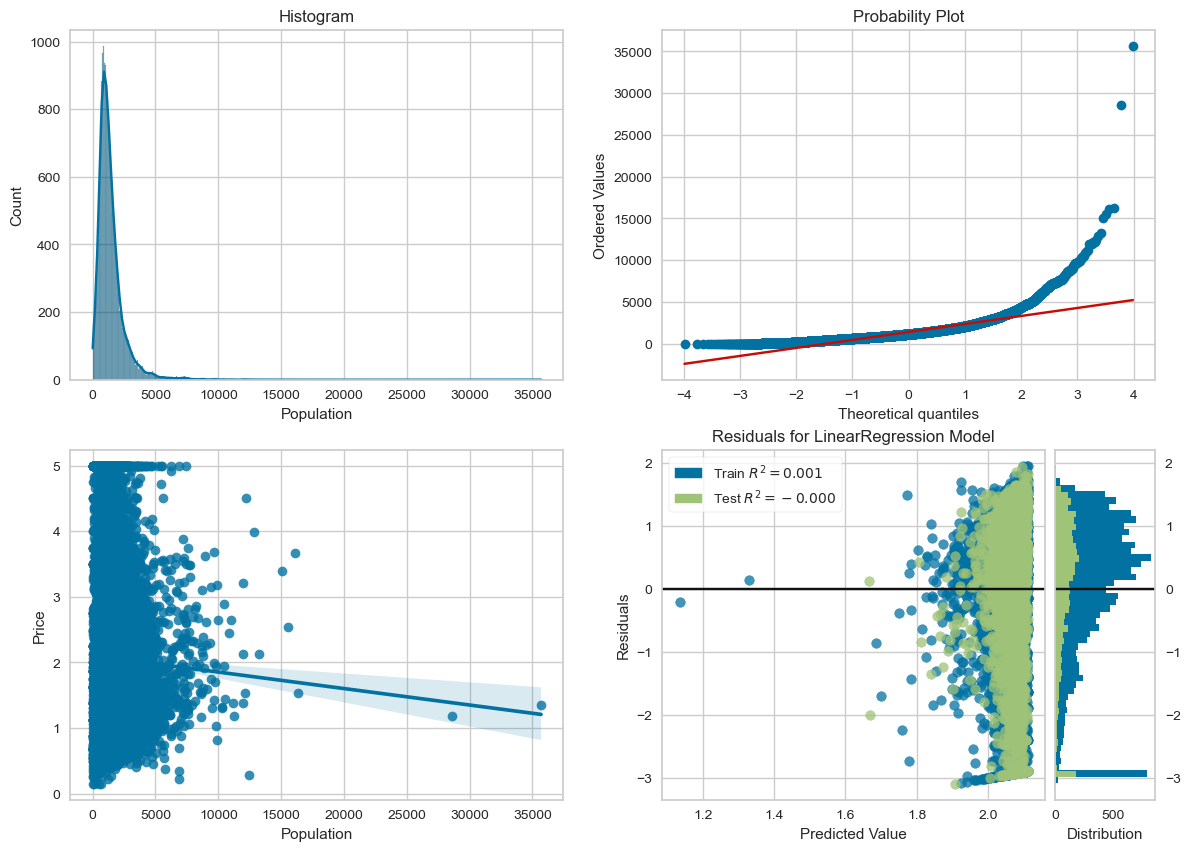

In [11]:
def check_linear_model_assumptions(df, variable):
    plt.figure(figsize=(14,10))
    ax = plt.subplot(2,2,1)

    sns.histplot(df[variable], kde=True, ax=ax)
    plt.title('Histogram')

    plt.subplot(2,2,2)
    stats.probplot(df[variable], dist='norm', plot=plt)

    ax = plt.subplot(2,2,3)
    sns.regplot(x='Population', y='Price', data=df, order=1, ax=ax)

    ax = plt.subplot(2,2,4)
    X_train, X_test, y_train, y_test = train_test_split(df[[variable]], california_housing['Price'],
                                                        test_size=0.2,
                                                       random_state=0)

    model = LinearRegression()
    visualizer = ResidualsPlot(model)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()
    plt.show()
#    plt.legend()

check_linear_model_assumptions(california_housing, 'Population')

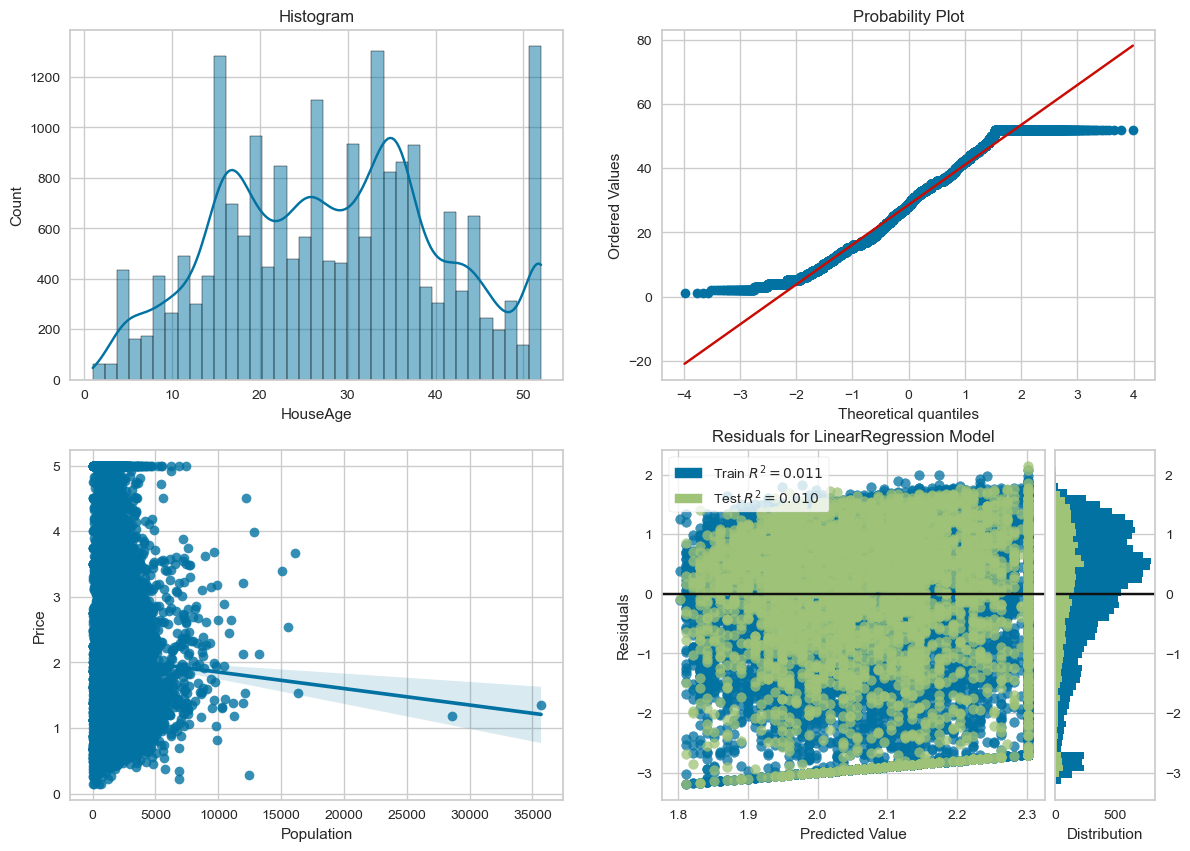

In [12]:
check_linear_model_assumptions(california_housing, 'HouseAge')

***
## __Detect Outliers in Machine Learning Datasets__ 

An outlier is an observation which deviates so much from the other observations as to arouse suspicions that it was generated by a different mechanism.

## __Outliers Visualization Plot__ 

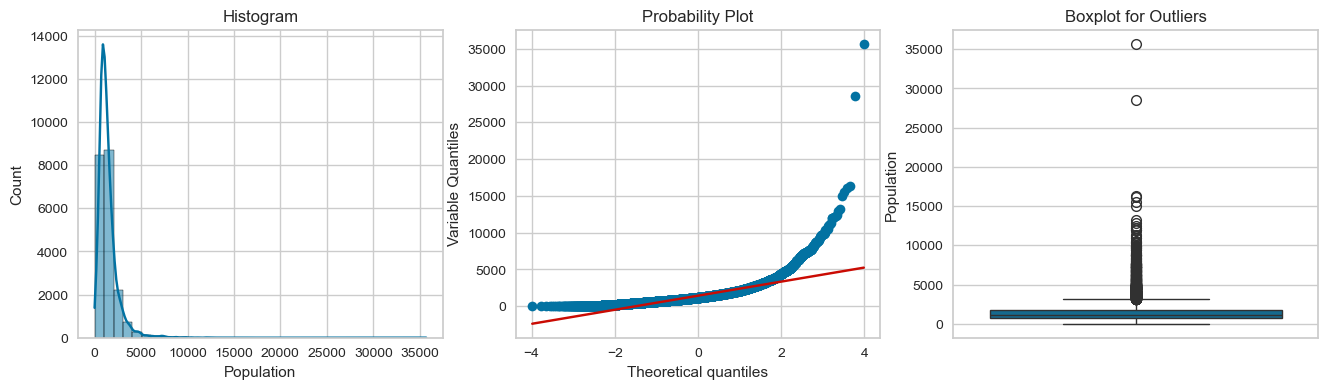

In [13]:
def check_outliers(df, variable):
    plt.figure(figsize=(16,4))
    
    ax = plt.subplot(1,3,1)
    #histogram
    sns.histplot(df[variable], bins=35, kde=True, ax=ax)
    plt.title('Histogram')
    
    # Probability Plot Q-Q PLot
    plt.subplot(1,3,2)
    stats.probplot(df[variable], dist='norm', plot=plt)
    plt.ylabel('Variable Quantiles')
    
    #boxplot
    plt.subplot(1,3,3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot for Outliers')
    
check_outliers(california_housing, 'Population')

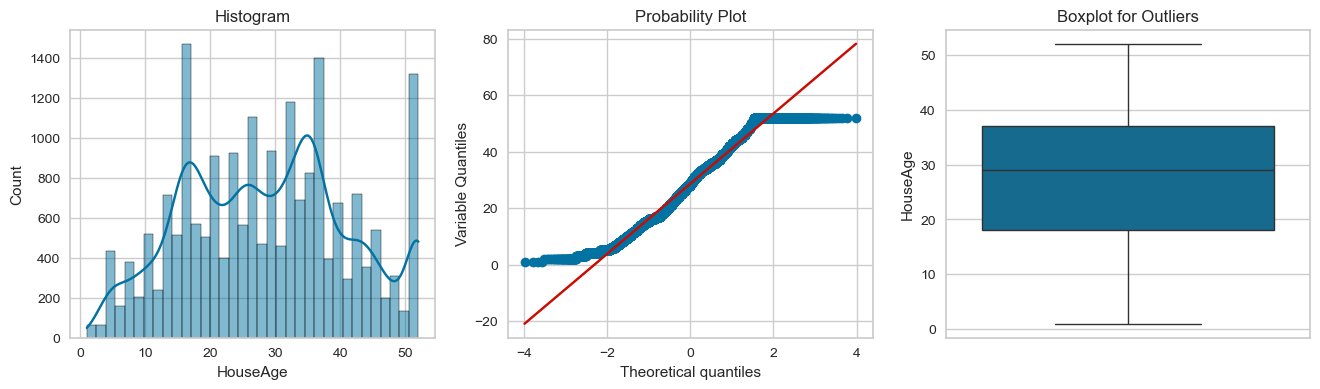

In [14]:
check_outliers(california_housing, 'HouseAge')

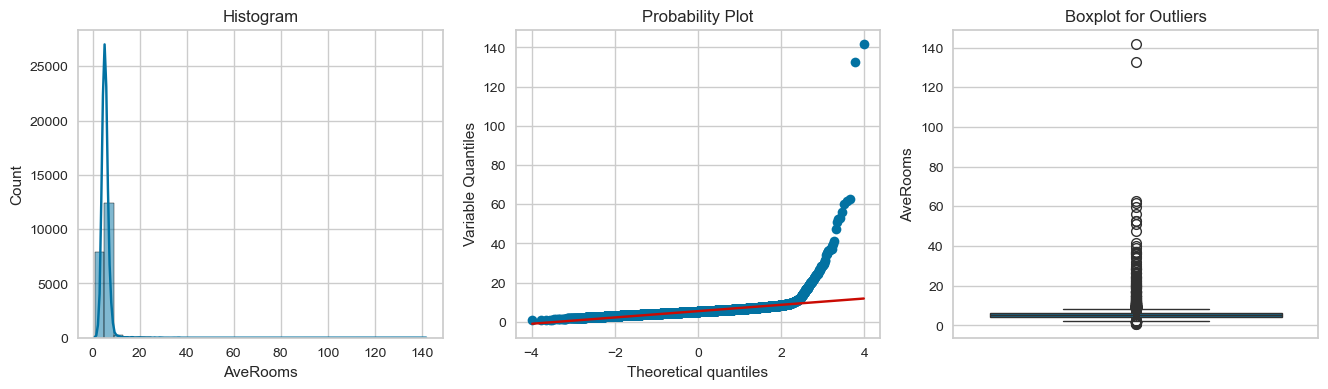

In [15]:
check_outliers(california_housing, 'AveRooms')

***
## __Outlier Detection for Normal Variables__

In [16]:
def find_normal_outliers(df, col):
    
    upper_limit = df[col].mean() + 2.7*df[col].std()
    lower_limit = df[col].mean() - 2.7*df[col].std()
    
    return lower_limit, upper_limit
    

In [17]:
find_normal_outliers(california_housing, 'HouseAge')

(-5.341519118592899, 62.62049198680995)

In [18]:
find_normal_outliers(california_housing, 'Population')

(-1632.170984580365, 4483.124472952458)

***
## __Outlier Detection for Skewed Variables__

In [19]:
def find_skewed_oultliers(df, col, distance):
    IQR = df[col].quantile(0.75)-df[col].quantile(0.25) # Q3-Q1
    
    lower_limit = df[col].quantile(0.25) - (IQR*distance)
    upper_limit = df[col].quantile(0.75) + (IQR*distance)
    
    return lower_limit, upper_limit

find_skewed_oultliers(california_housing, 'Population', 1.5)

(-620.0, 3132.0)

In [20]:
california_housing['Population']>3132.0

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: Population, Length: 20640, dtype: bool

In [21]:
california_housing[california_housing['Population']>3132.0]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
95,2.0096,36.0,2.294016,1.066294,3469.0,1.493328,37.80,-122.26,1.300
185,2.1917,43.0,4.844029,1.091795,4367.0,3.547522,37.79,-122.23,1.128
283,5.9849,22.0,6.528724,1.041179,4985.0,2.534316,37.79,-122.16,3.710
460,1.4012,52.0,3.105714,1.060000,3337.0,9.534286,37.87,-122.26,1.750
485,1.6307,35.0,2.962687,1.001148,3276.0,1.880597,37.86,-122.26,2.536
...,...,...,...,...,...,...,...,...,...
20543,1.7311,33.0,3.882852,1.029994,3717.0,2.103565,38.55,-121.74,1.826
20544,2.0650,23.0,4.803493,1.013646,6330.0,3.455240,38.55,-121.76,2.194
20563,3.1250,9.0,5.148007,1.119593,6837.0,2.899491,38.67,-121.75,1.325
20604,2.3496,17.0,4.551392,0.962527,3265.0,3.495717,39.12,-121.54,0.650


***
## __Outliers Handling Coding__

## How can we pre-process outliers?

**Outliers: Gems or Glitches?**

Data often throws up unusual observations, outliers that stand apart from the crowd. But are they valuable insights or annoying glitches? Before diving into analysis, we need to decide how to handle these outliers. Enter **outlier pre-processing**!

**Taming the Wild Ones:**

* **Trimming:** Like pruning a garden, we can carefully remove outliers deemed too extreme to represent the true data pattern. Imagine trimming away a single rogue sunflower towering over a field of daisies.

* **Treat Outliers as missing data:** Sometimes, knowledge is knowing when you don't know. Treating outliers as missing data opens the door to imputation techniques like mean or median replacement. Think of patching up a ripped map with the surrounding landscape's features.

* **Binning Bliss:** Instead of ostracizing outliers, we can invite them to the neighborhood party! Discrestization groups data into bins, and sometimes, outliers get to share a bin with their closest neighbors, reducing their influence without complete removal. Picture everyone dancing at a block party, where the tallest person might still stand out, but at least they're having fun with the rest of the street!

* **Censoring the Extremes:** Sometimes, like setting boundaries for rambunctious children, we might need to set limits on our data. Censoring, also known as top and bottom coding, winsorization, or capping, replaces extreme values with predefined thresholds. Imagine putting fences around a playground to ensure everyone enjoys the space safely.

**Censoring's Many Names:**

Censoring, like a chameleon, can adapt to different situations. Here are its aliases:

* **Top and Bottom Coding:** Think of setting minimum and maximum heights for entry into a club. Values exceeding these limits get "censored" to fit within the allowed range.

* **Winsorization:** Instead of outright rejection, Winsorization gently nudges outliers closer to the pack. Imagine reshuffling the tallest kids at the party into the next height group, ensuring everyone still gets to play.

* **Capping:** Like putting a lid on a boiling pot, capping sets a limit on how high or low values can go. Any attempt to go beyond gets clipped to the defined ceiling or floor.

**Remember:**

Outlier pre-processing is a delicate dance. Choose your method wisely, considering the nature of your data and the impact on your analysis. Sometimes, outliers can hold valuable insights, so treat them with respect and curiosity!



`!pip install feature-engine --user`<br>
`!conda list`<br>
`!pip show feature-engine`<br>

https://feature-engine.readthedocs.io/en/latest/index.html

https://feature-engine.readthedocs.io/en/latest/outliercappers/Winsorizer.html

In [22]:
from feature_engine.outliers import Winsorizer

In [23]:
winsorizer = winsorizer = Winsorizer(
    #capping_method='skewed',
    tail='both',
    fold=1.5,
    variables=features,
    missing_values='raise'
)

In [24]:
california_housing_clean = winsorizer.fit_transform(california_housing)

In [25]:
california_housing_clean

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,6.720335,41.000000,6.984127,1.023810,322.0,2.555556,37.880000,-122.23,4.526
1,6.720335,21.000000,6.238137,0.971880,2401.0,2.109842,37.860000,-122.22,3.585
2,6.720335,47.517366,8.288136,1.073446,496.0,2.802260,37.850000,-122.24,3.521
3,5.643100,47.517366,5.817352,1.073059,558.0,2.547945,37.850000,-122.25,3.413
4,3.846200,47.517366,6.281853,1.081081,565.0,2.181467,37.850000,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.560300,25.000000,5.045455,1.133333,845.0,2.560606,38.835712,-121.09,0.781
20636,2.556800,18.000000,6.114035,1.315789,356.0,3.122807,38.835712,-121.21,0.771
20637,1.700000,17.000000,5.205543,1.120092,1007.0,2.325635,38.835712,-121.22,0.923
20638,1.867200,18.000000,5.329513,1.171920,741.0,2.123209,38.835712,-121.32,0.847


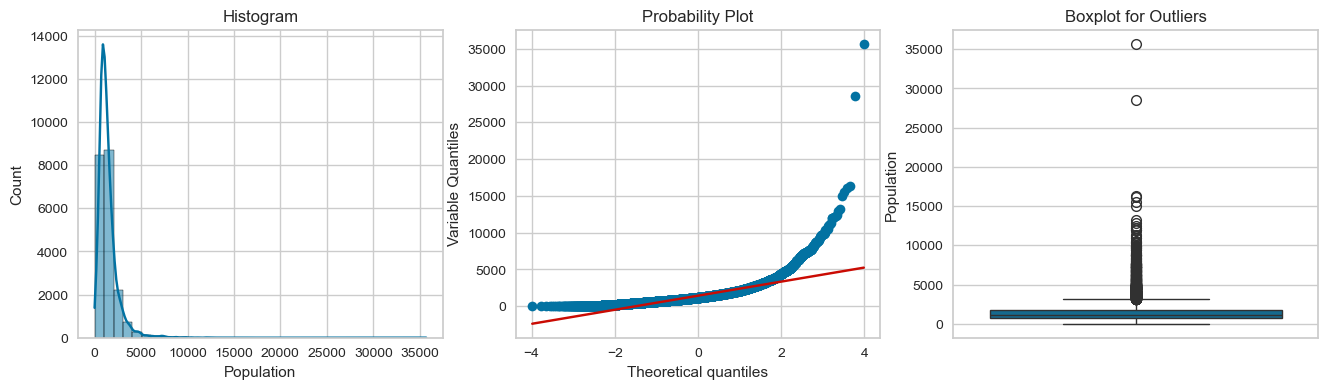

In [26]:
check_outliers(california_housing, 'Population')

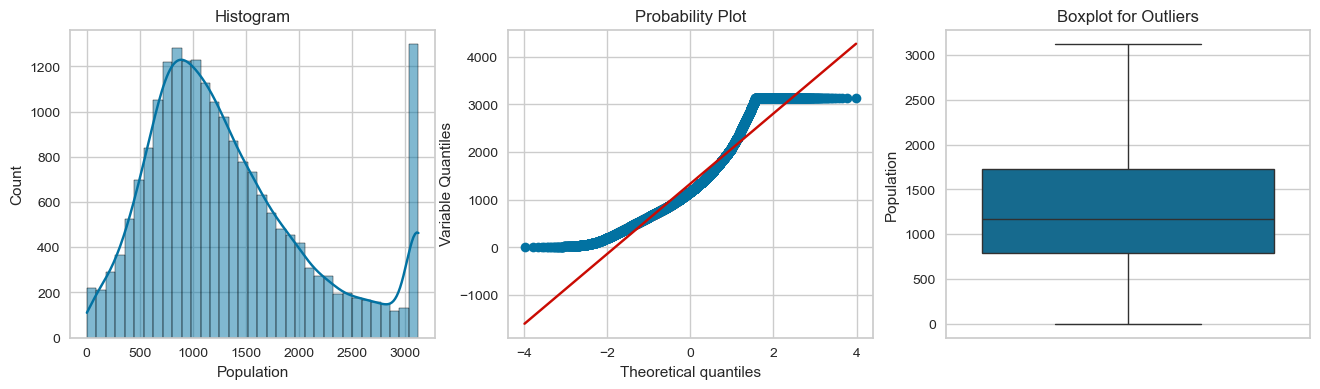

In [27]:
check_outliers(california_housing_clean, 'Population')

E:\Data_Science_Envs\Linear_Reg_Env\env\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
E:\Data_Science_Envs\Linear_Reg_Env\env\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


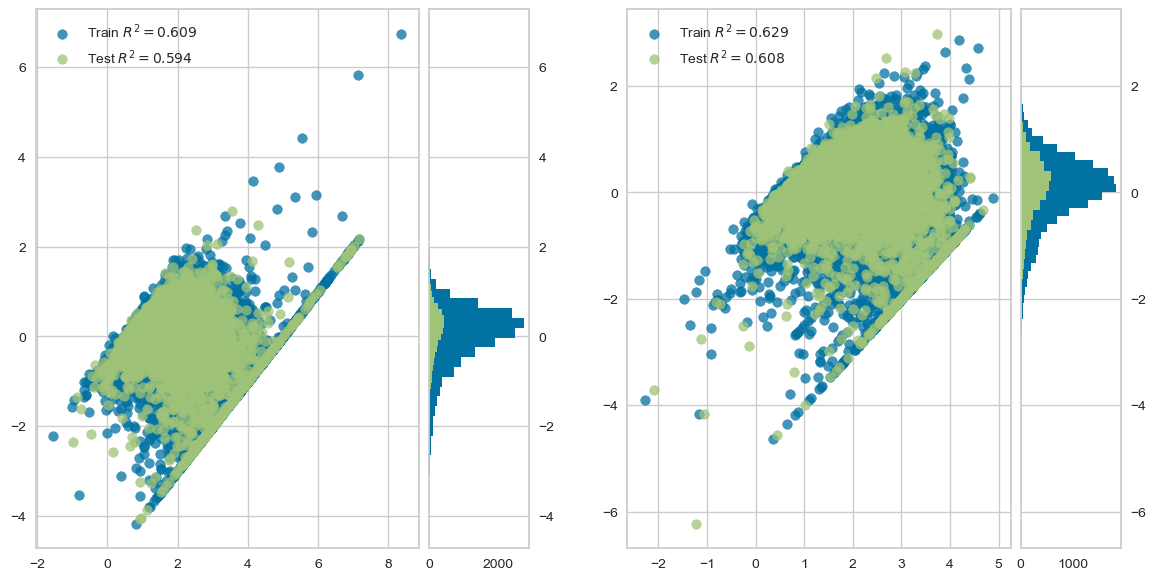

In [28]:
def run_Clean_Linear_Regression(df, cols):
    fig,ax = plt.subplots(ncols=2, figsize=(14,7))
    
    #reference plot
    X_train, X_test, y_train, y_test = train_test_split(california_housing[features], california_housing['Price'],
                test_size=0.2,
                random_state=0)
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    visualizer = ResidualsPlot(model, ax=ax[0])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    plt.legend()
  

    #Residuals Plot with Selected Features and Removed Outliers
    X_train, X_test, y_train, y_test = train_test_split(df, california_housing['Price'],
                test_size=0.2,
                random_state=0)
    
    winsorizer = Winsorizer(#distribution='skewed',
                       tail='both',
                       fold=1.5,
                       variables=cols)
    
    X_train = winsorizer.fit_transform(X_train)
    X_test = winsorizer.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    visualizer = ResidualsPlot(model, ax=ax[1])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    plt.legend()

    
run_Clean_Linear_Regression(california_housing[features], features)

In [29]:
imp_features

['HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

E:\Data_Science_Envs\Linear_Reg_Env\env\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
E:\Data_Science_Envs\Linear_Reg_Env\env\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


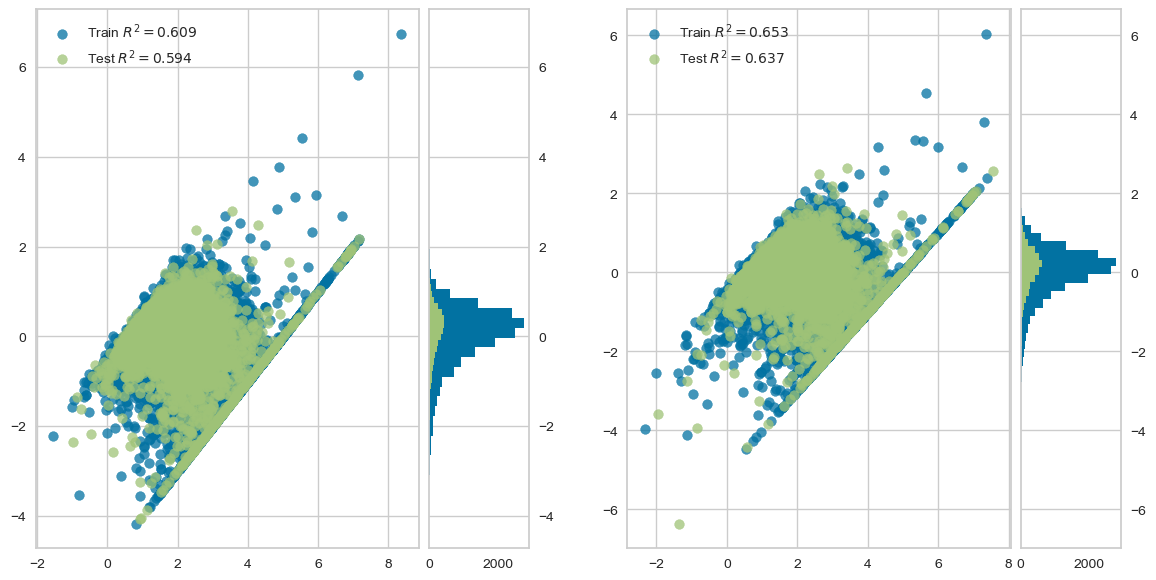

In [30]:
run_Clean_Linear_Regression(california_housing[features], imp_features)

***
## __Feature Transformation and Outliers Removal__

In [31]:
from sklearn.preprocessing import PowerTransformer

E:\Data_Science_Envs\Linear_Reg_Env\env\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


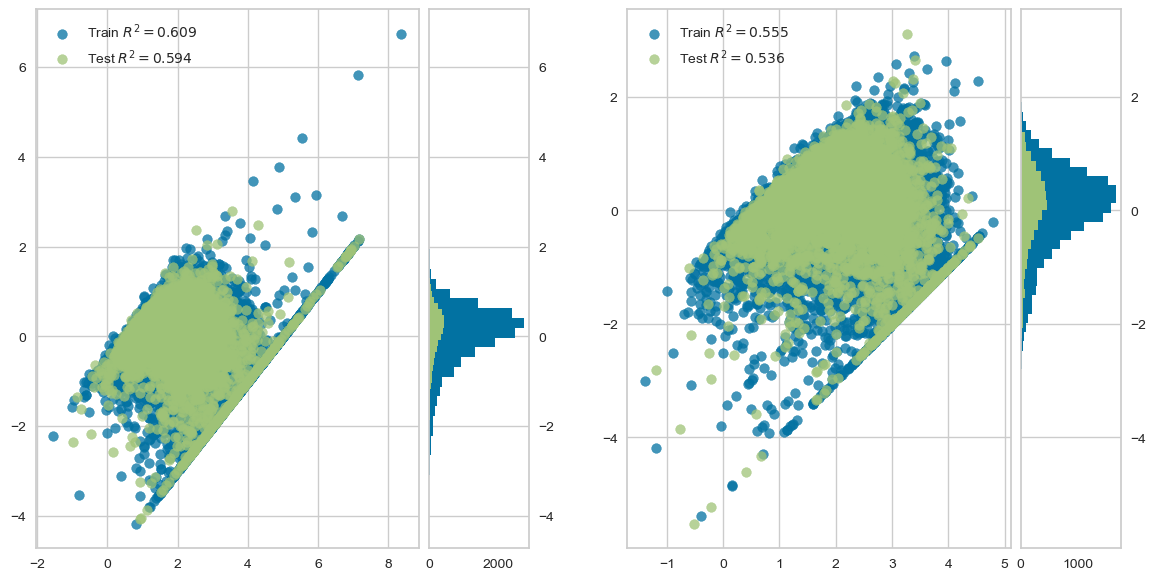

In [32]:
def run_Outliers_Transformations_Linear_Regression(df, cols):
    fig,ax = plt.subplots(ncols=2, figsize=(14,7))
    
    #reference plot
    X_train, X_test, y_train, y_test = train_test_split(california_housing[features], california_housing['Price'],
                test_size=0.2,
                random_state=0)
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    visualizer = ResidualsPlot(model, ax=ax[0])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    plt.legend()
  

    #Residuals Plot with Selected Features and Removed Outliers and Yeo-Johnson Transformation
    X_train, X_test, y_train, y_test = train_test_split(df, california_housing['Price'],
                test_size=0.2,
                random_state=0)
    
    #outliers removal
    winsorizer = Winsorizer(#distribution='skewed',
                       tail='both',
                       fold=1.5,
                       variables=cols)
    
    X_train = winsorizer.fit_transform(X_train)
    X_test = winsorizer.transform(X_test)
    
    #transformations
    transformer = PowerTransformer(method='yeo-johnson', standardize=True)
    X_train = transformer.fit_transform(X_train)
    X_test = transformer.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    visualizer = ResidualsPlot(model, ax=ax[1])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    plt.legend()

    
run_Outliers_Transformations_Linear_Regression(california_housing[features], features)

E:\Data_Science_Envs\Linear_Reg_Env\env\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


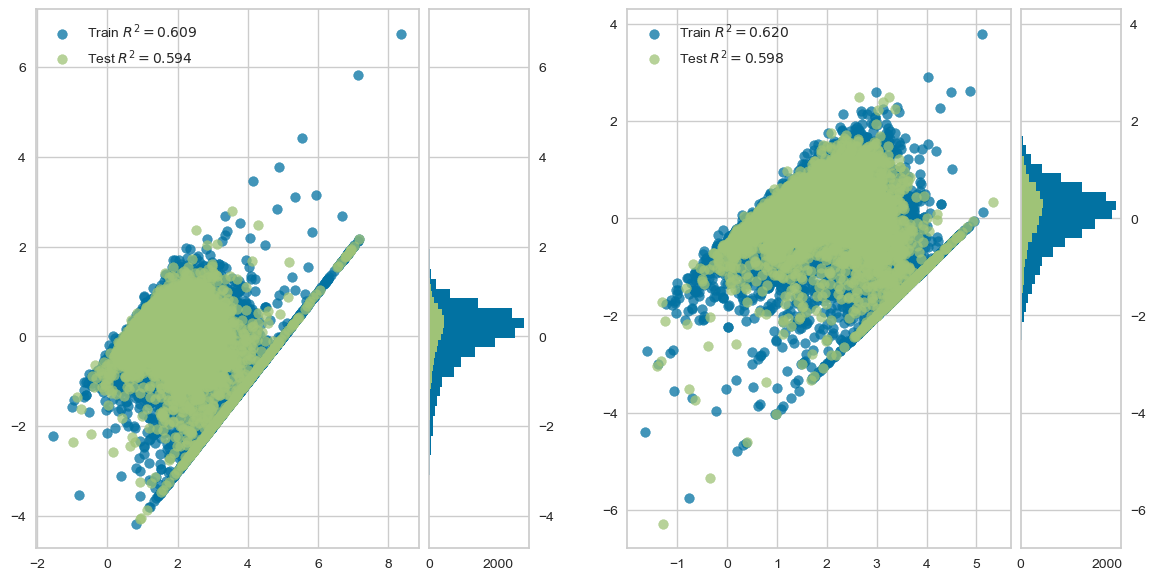

In [33]:
run_Outliers_Transformations_Linear_Regression(california_housing[features], imp_features)

E:\Data_Science_Envs\Linear_Reg_Env\env\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


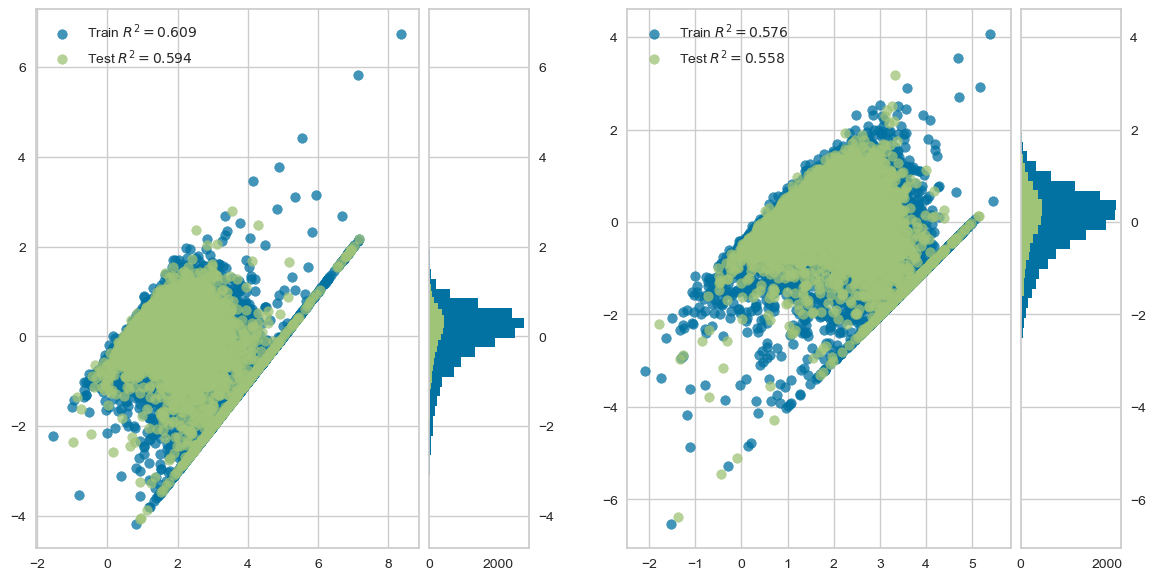

In [34]:
run_Outliers_Transformations_Linear_Regression(california_housing[features], ['Population', 'HouseAge', 'Longitude'])

E:\Data_Science_Envs\Linear_Reg_Env\env\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


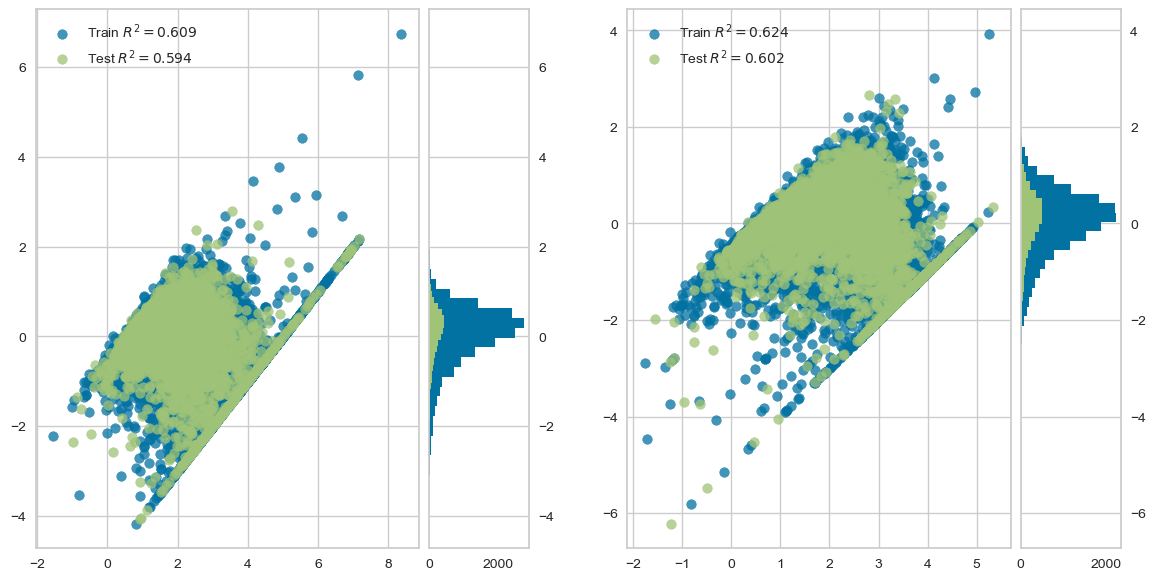

In [35]:
run_Outliers_Transformations_Linear_Regression(california_housing[features], ['AveOccup', 'AveBedrms'])

In [36]:
features

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']